## King County, WA Property Business Plan

* Student names: Brenda De Leon, Kelly Mullaney, & Kevin Rivera
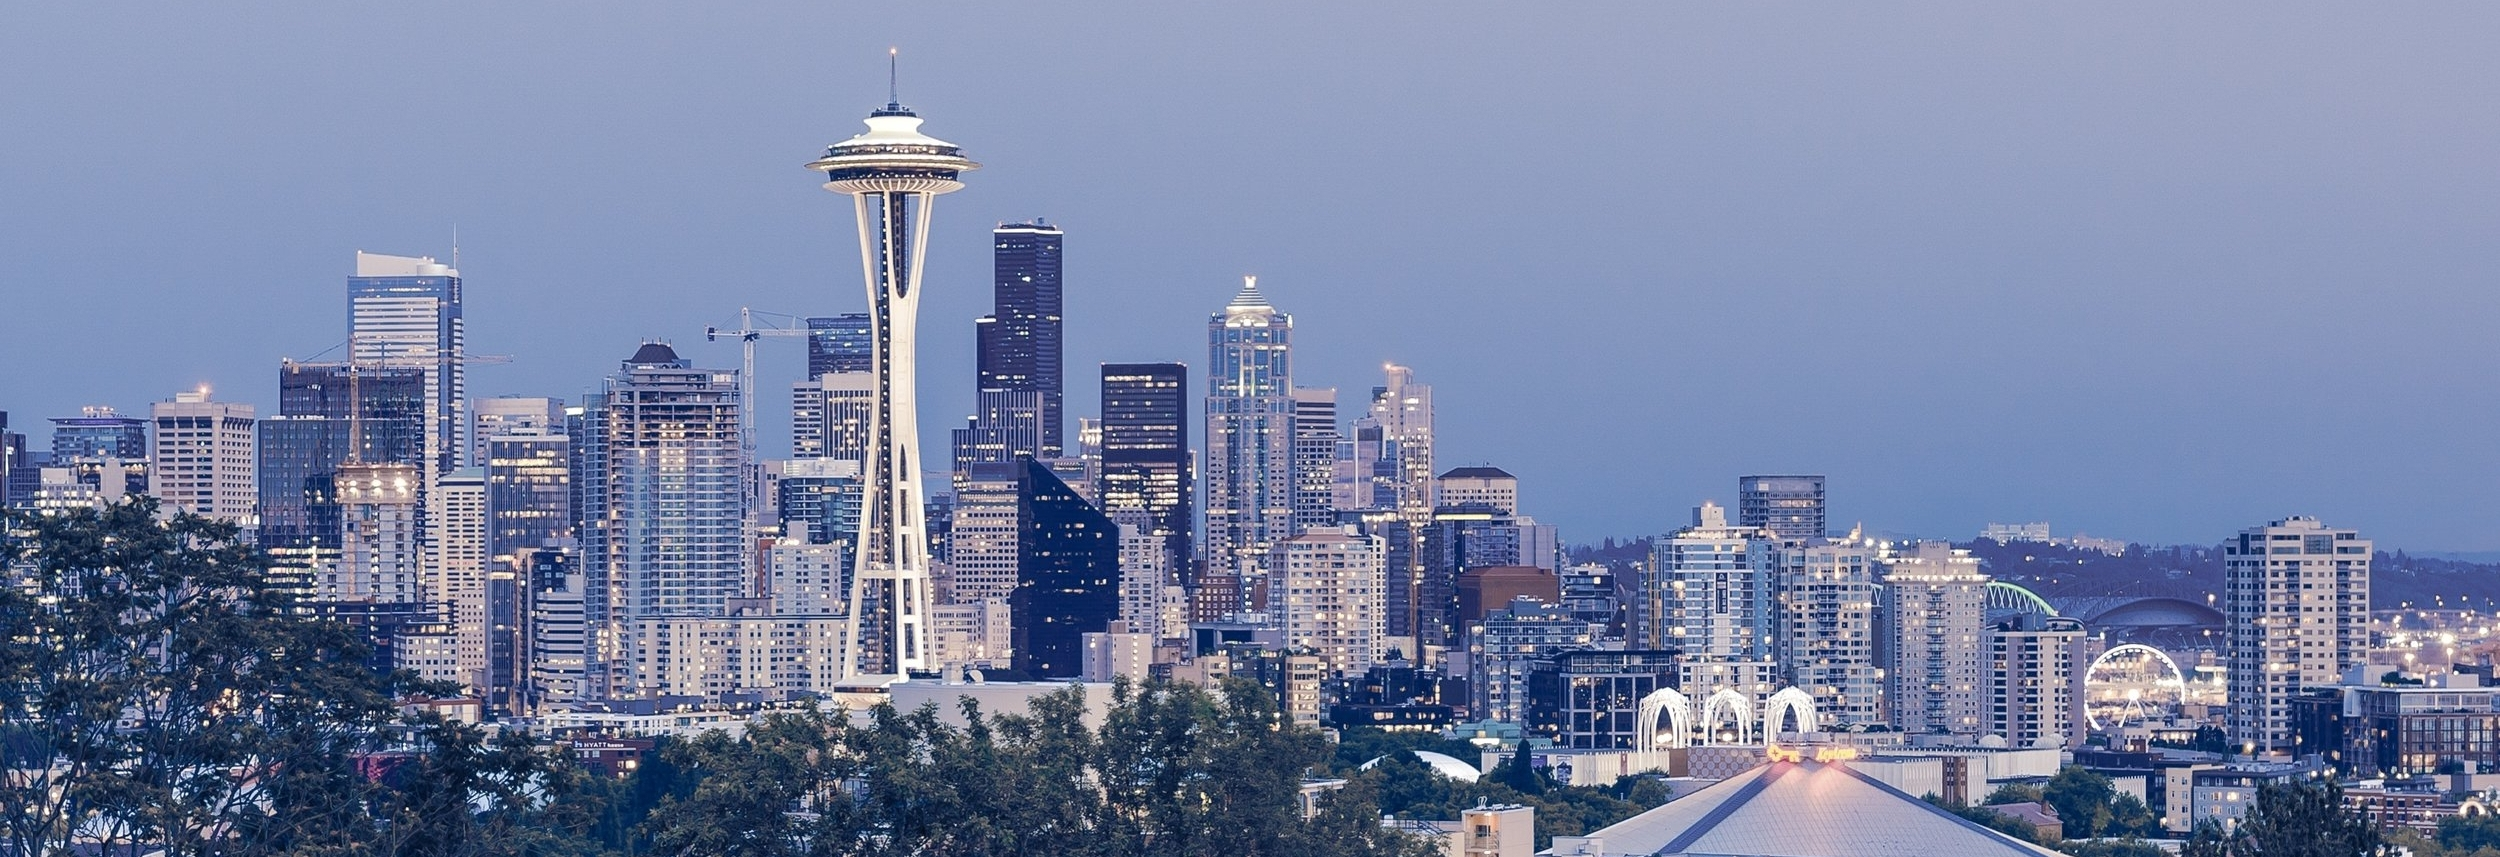


In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import datetime
datetime.datetime.strptime
import seaborn as sns
# SciKitLearn 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-notebook')

# Data Cleaning Process

In [6]:
df = pd.read_csv('./data/kc_house_data.csv', parse_dates=['date']) # specify parse date to avoid object dtype for dates

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
#identifying nulls, columns, dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

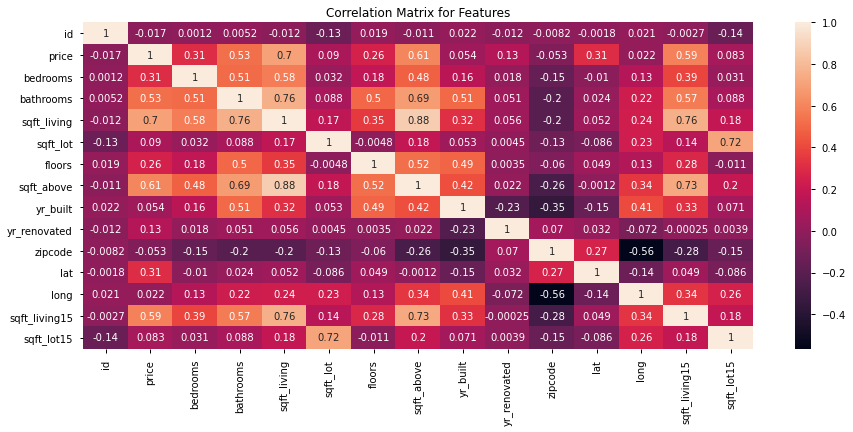

In [8]:
#Created a heatmap to see correlations of all columns in data
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

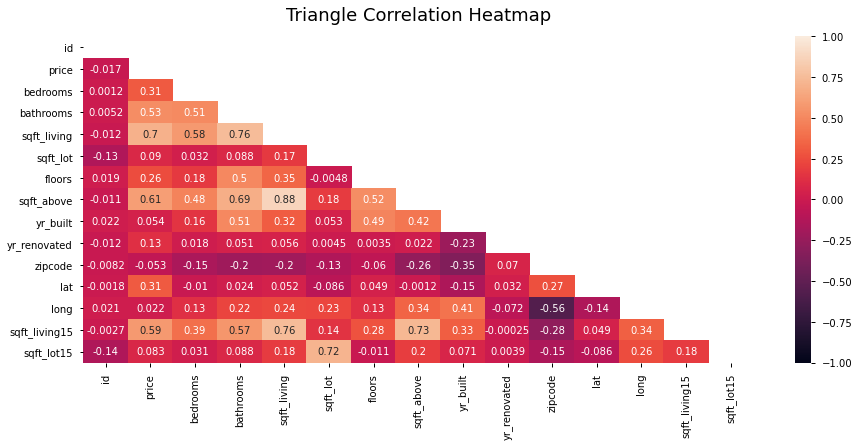

In [9]:
#Masked Data to show only one side of the heat map
plt.figure(figsize=(15,6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [10]:
#dropped columns we felt were not needed for our recommendations and those that were redundant through multiculinearity
df.drop(columns= ['waterfront', 'view', 'sqft_above','sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'id', 'date'], inplace=True)

In [11]:
#ordinal encoding process for 'condition'
df['condition'] = df['condition'].astype('category')
df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average', 'Good', 'Very Good'])
df['condition'].cat.codes
ord_cat_selector = ['condition']
cat_subset = df[ord_cat_selector]
cat_subset['condition'].unique()
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
o_enc = OrdinalEncoder(categories = [condition_list])
o_enc.fit(cat_subset)
X_subset = pd.DataFrame(o_enc.transform(cat_subset),
                        columns = cat_subset.columns)
X_subset

,condition
0,2.0
1,2.0
2,2.0
3,4.0
4,2.0
...,...
21592,2.0
21593,2.0
21594,2.0
21595,2.0


In [12]:
#made a new row in the dataframe containing the ordinal encoded condition codes
df['condition_code'] = X_subset

In [13]:
#ordinal encoding process for 'grade'
df['grade'] = df['grade'].astype('category')
df['grade'] = df['grade'].cat.reorder_categories(['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])
df['grade'].cat.codes
grade_ord_cat_selector = ['grade']
grade_cat_subset = df[grade_ord_cat_selector]
grade_cat_subset
grade_cat_subset['grade'].unique()
grade_cat_subset['grade'].value_counts()
grade_list = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']
o_enc = OrdinalEncoder(categories = [grade_list])
o_enc.fit(grade_cat_subset)
G_subset = pd.DataFrame(o_enc.transform(grade_cat_subset),
                        columns = grade_cat_subset.columns)
G_subset

,grade
0,4.0
1,4.0
2,3.0
3,4.0
4,5.0
...,...
21592,5.0
21593,5.0
21594,4.0
21595,5.0


In [14]:
#creating new column for encoded grade values
df['grade_code'] = G_subset 

In [15]:
#confirming new encoded value columns [10] and [11]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           21597 non-null  float64 
 1   bedrooms        21597 non-null  int64   
 2   bathrooms       21597 non-null  float64 
 3   sqft_living     21597 non-null  int64   
 4   sqft_lot        21597 non-null  int64   
 5   floors          21597 non-null  float64 
 6   condition       21597 non-null  category
 7   grade           21597 non-null  category
 8   yr_built        21597 non-null  int64   
 9   yr_renovated    17755 non-null  float64 
 10  zipcode         21597 non-null  int64   
 11  condition_code  21597 non-null  float64 
 12  grade_code      21597 non-null  float64 
dtypes: category(2), float64(6), int64(5)
memory usage: 1.9 MB


In [16]:
#checking values of 'grade_code' and 'grade' to confirm values match
df['grade_code'].value_counts()

4.0     8974
5.0     6065
6.0     2615
3.0     2038
7.0     1134
8.0      399
2.0      242
9.0       89
1.0       27
10.0      13
0.0        1
Name: grade_code, dtype: int64

In [17]:
#checking values of 'grade_code' and 'grade' to confirm values match
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [18]:
#creating filter to scale down scatterplot for presentation visual purpose
sqft_filter = df[(df['sqft_living'] < 6000)]

/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


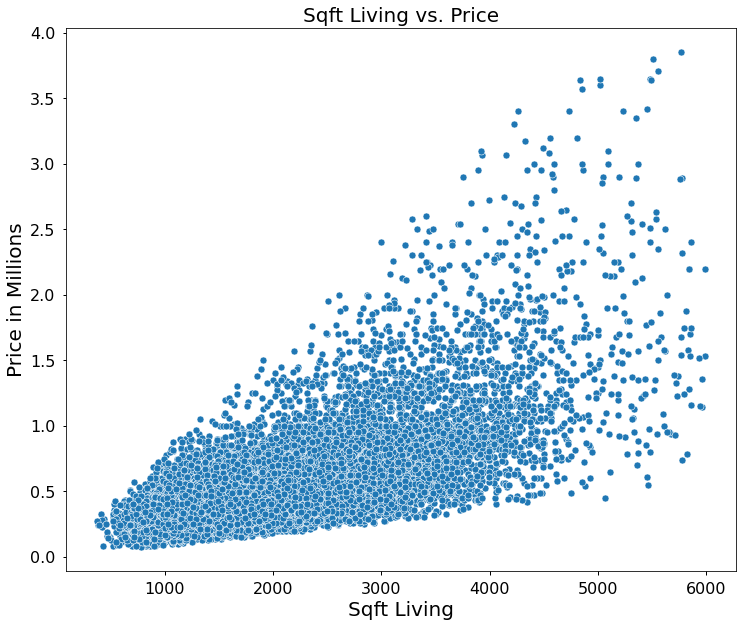

<Figure size 576x396 with 0 Axes>

In [19]:
#plot 'price' vs. sqft_living'

plt.figure(figsize = (12, 10))
sns.scatterplot(sqft_filter['sqft_living'], sqft_filter['price']/1e6)
plt.title('Sqft Living vs. Price',fontsize = 20)
plt.xlabel('Sqft Living',fontsize = 20)
plt.ylabel('Price in Millions',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()
plt.savefig('./Data/sqft_price_barplot')

/Users/brendadeleon/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


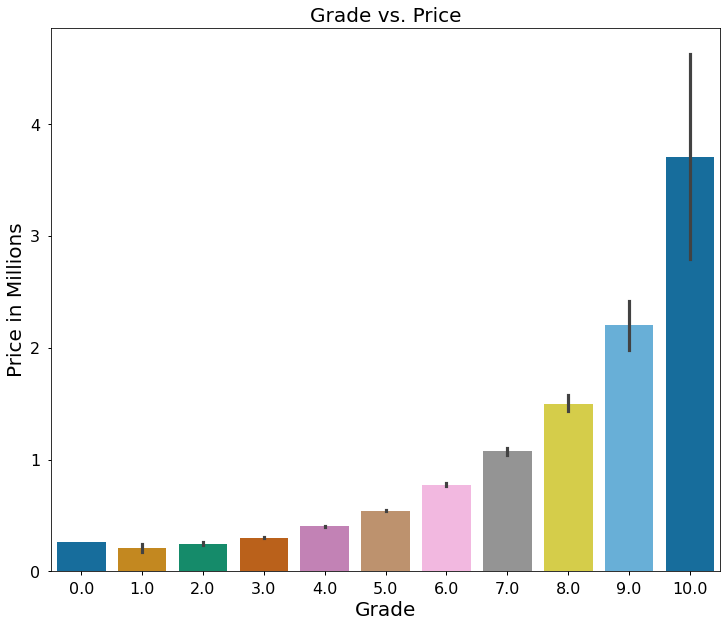

<Figure size 576x396 with 0 Axes>

In [20]:
#barplot 'grade' vs. 'price'  distribution
plt.figure(figsize = (12, 10))
sns.barplot(df['grade_code'], df['price']/1e6, 
            palette = "colorblind")

plt.title('Grade vs. Price',fontsize = 20)
plt.xlabel('Grade',fontsize = 20)
plt.ylabel('Price in Millions',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16);
plt.show()
plt.savefig('./Data/grade_vs_price_barplot')

# Modeling

## Scaling Model 1

In [21]:
#scale features for first model
columns = ['sqft_living', 'bathrooms', 'bedrooms']
X = df[columns]
ss = StandardScaler().fit(X)
X_scaled = ss.transform(X)

In [22]:
X_c = sm.add_constant(X_scaled)
y = df['price']

In [23]:
model = sm.OLS(endog=y,exog=X_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:13:22   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.403e+05   1755.416    307.788      0.000    5.37e+05    5.44e+05
x1          2.848e+05   2847.439    100.011      0.000    2.79e+05     2.9e+05
x2          5889.5876   2709.301      2.174      0.030     579.157    1.12e+04
x3         -5.426e+04   2174.555    -24.950      0.000   -5.85e+04      -5e+04
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

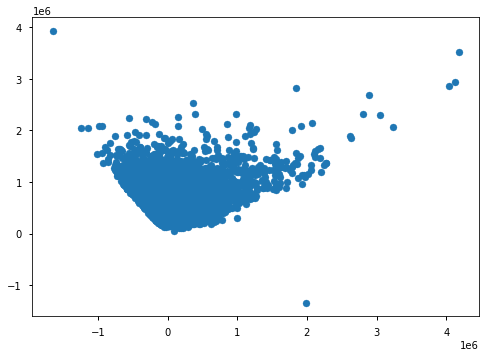

In [24]:
#Get a visual of predictions vs residuals
model_preds = model.predict(X_c)
resids = y - model_preds

fig, ax = plt.subplots()
ax.scatter(resids,model_preds)


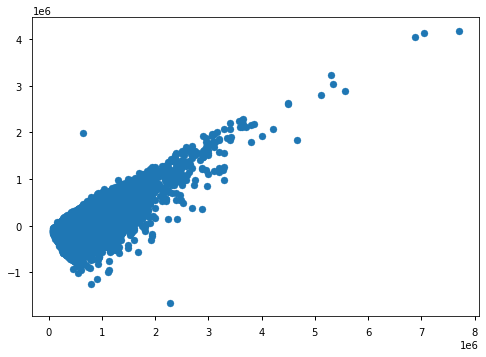

In [25]:
#Get a visual of price vs residuals
fig, ax = plt.subplots()
ax.scatter(y,resids)

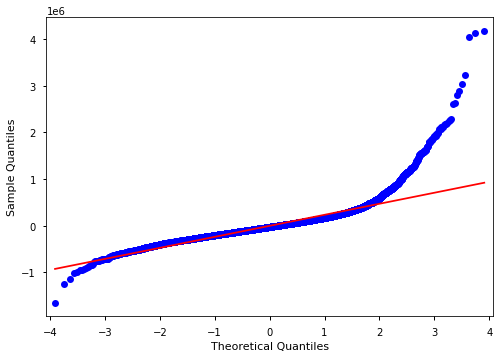

In [26]:
#residuals and best fit line
sm.qqplot(resids,line='r');

## Model 2 with logged Price 

In [27]:
#log the price
y_log = np.log(y)
model2 = sm.OLS(endog=y_log,exog=X_c).fit()
model2_preds = model2.predict(X_c)
model2_resids = y_log - model2_preds
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     6943.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:13:23   Log-Likelihood:                -9500.0
No. Observations:               21597   AIC:                         1.901e+04
Df Residuals:                   21593   BIC:                         1.904e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0482      0.003   5103.981      0.000      13.043      13.053
x1             0.3646      0.004     87.929      0.000       0.356       0.373
x2             0.0410      0.004     10.389      0.000       0.033       0.049
x3            -0.0511      0.003    -16.145      0.000      -0.057      -0.045
==============================================================================
Omnibus:                       13.826   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.144
Skew:                           0.048   Prob(JB):                     0.000849
Kurtosis:                       3.080   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

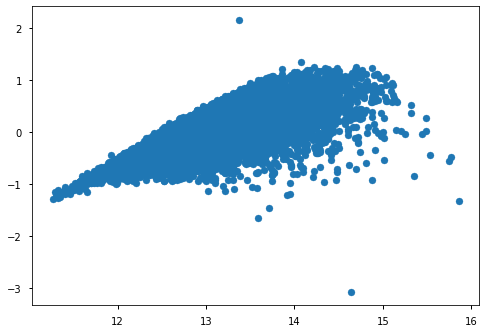

In [28]:
#visual of new y log vs model 2 residuals
fig, ax = plt.subplots()
ax.scatter(y_log,model2_resids)

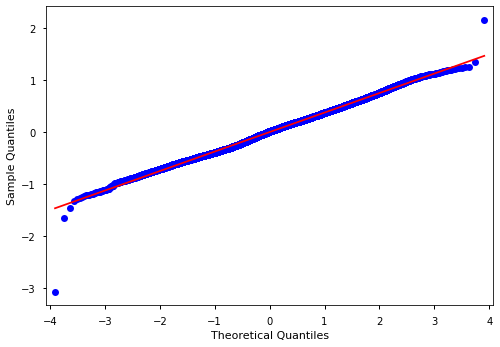

In [29]:
#visual of logged price residual line
sm.qqplot(model2_resids,line='r');

In [30]:

columns = ['sqft_living','grade_code']
X = df[columns]
ss = StandardScaler().fit(X)
X_scaled = ss.transform(X)
X_c = sm.add_constant(X_scaled)

In [31]:
y_log = np.log(y)
model4 = sm.OLS(endog=y_log,exog=X_c).fit()
model4_preds = model4.predict(X_c)
model4_resids = y_log - model4_preds
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 1.348e+04
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:13:25   Log-Likelihood:                -8043.2
No. Observations:               21597   AIC:                         1.609e+04
Df Residuals:                   21594   BIC:                         1.612e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0482      0.002   5460.265      0.000      13.044      13.053
x1             0.1995      0.004     53.974      0.000       0.192       0.207
x2             0.2184      0.004     59.100      0.000       0.211       0.226
==============================================================================
Omnibus:                       55.875   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.557
Skew:                           0.116   Prob(JB):                     8.63e-13
Kurtosis:                       2.909   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 3 Y log and more features

In [32]:

columns = ['sqft_living','sqft_lot','grade_code','condition_code','yr_built','bedrooms']
X = df[columns]
ss = StandardScaler().fit(X)
X_scaled = ss.transform(X)
X_c = sm.add_constant(X_scaled)


In [33]:
y_log = np.log(y)
model3 = sm.OLS(endog=y_log,exog=X_c).fit()
model3_preds = model3.predict(X_c)
model3_resids = y_log - model3_preds
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     5916.
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:13:26   Log-Likelihood:                -6292.2
No. Observations:               21597   AIC:                         1.260e+04
Df Residuals:                   21590   BIC:                         1.265e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0482      0.002   5920.862      0.000      13.044      13.053
x1             0.2037      0.004     50.788      0.000       0.196       0.212
x2            -0.0076      0.002     -3.379      0.001      -0.012      -0.003
x3             0.2888      0.004     78.746      0.000       0.282       0.296
x4             0.0251      0.002     10.555      0.000       0.020       0.030
x5            -0.1393      0.003    -53.230      0.000      -0.144      -0.134
x6            -0.0187      0.003     -6.790      0.000      -0.024      -0.013
==============================================================================
Omnibus:                       78.159   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.559
Skew:                          -0.111   Prob(JB):                     2.64e-19
Kurtosis:                       3.214   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### For next steps we will target price per square foot

In [34]:
#Reducing some of the extreme size outliers.
df['sqft_living'].quantile(0.97)

4140.0

In [35]:
#Creating a filter at 4,200 sq ft
sqft = df[(df['sqft_living'] > 0) & (df['sqft_living'] < 4200)].copy()

In [36]:
#creating a df with properties that have been renovated
reno = sqft.loc[sqft['yr_renovated'] > 1]
reno.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,condition_code,grade_code
count,7.090000e+02,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,6.919542e+05,3.407616,2.235190,2184.427362,15922.342736,1.485896,1938.842031,1995.647391,98096.495063,2.218618,4.633286
std,4.138917e+05,1.045031,0.815063,807.462566,38996.693526,0.487642,21.966343,15.832449,54.357667,0.519553,1.054084
min,1.100000e+05,1.000000,0.750000,520.000000,1024.000000,1.000000,1900.000000,1934.000000,98001.000000,0.000000,1.000000
25%,4.040000e+05,3.000000,1.750000,1540.000000,4961.000000,1.000000,1921.000000,1987.000000,98042.000000,2.000000,4.000000
50%,5.950000e+05,3.000000,2.000000,2140.000000,7200.000000,1.500000,1941.000000,2000.000000,98112.000000,2.000000,5.000000
75%,8.550000e+05,4.000000,2.750000,2760.000000,11651.000000,2.000000,1954.000000,2007.000000,98126.000000,2.000000,5.000000
max,2.700000e+06,11.000000,5.750000,4180.000000,478288.000000,3.000000,2003.000000,2015.000000,98199.000000,4.000000,8.000000


In [37]:
#creating a df with properties that have not been renovated
no_reno = sqft.loc[sqft['yr_renovated'] < 1]
no_reno.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,condition_code,grade_code
count,1.653000e+04,16530.000000,16530.000000,16530.000000,1.653000e+04,16530.000000,16530.000000,16530.0,16530.000000,16530.000000,16530.000000
mean,4.998677e+05,3.342045,2.064822,1989.524259,1.437713e+04,1.482486,1971.975076,0.0,98077.640774,2.422263,4.576165
std,2.681482e+05,0.905348,0.704317,758.393358,3.995769e+04,0.538307,28.794290,0.0,53.326100,0.657455,1.067922
min,8.000000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,0.0,98001.000000,0.000000,0.000000
25%,3.150695e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,1953.000000,0.0,98033.000000,2.000000,4.000000
50%,4.400000e+05,3.000000,2.250000,1880.000000,7.506500e+03,1.000000,1976.000000,0.0,98065.000000,2.000000,4.000000
75%,6.140000e+05,4.000000,2.500000,2470.000000,1.032000e+04,2.000000,1997.000000,0.0,98117.000000,3.000000,5.000000
max,3.100000e+06,33.000000,7.500000,4190.000000,1.651359e+06,3.500000,2015.000000,0.0,98199.000000,4.000000,9.000000


In [38]:
#creating renovated and non renovated samples
reno_sample = reno.sample(n=500,random_state=42)
#reno_sample
no_reno_sample = no_reno.sample(n=500,random_state=42)
no_reno_sample

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,condition_code,grade_code
15010,633000.0,4,2.50,2020,8044,2.0,Average,8 Good,1990,0.0,98074,2.0,5.0
18355,554000.0,5,2.25,1870,11411,1.0,Good,8 Good,1961,0.0,98155,3.0,5.0
15605,329950.0,3,2.25,2070,7995,1.0,Average,7 Average,1987,0.0,98031,2.0,4.0
4508,312000.0,3,2.50,2280,6386,2.0,Average,8 Good,2008,0.0,98042,2.0,5.0
716,405500.0,3,1.50,1010,8108,1.0,Very Good,7 Average,1954,0.0,98155,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20968,343000.0,6,5.00,2732,7655,2.0,Average,7 Average,2009,0.0,98002,2.0,4.0
11230,269950.0,3,1.75,1760,12823,1.0,Good,7 Average,1956,0.0,98002,3.0,4.0
16141,465000.0,4,2.25,2140,7701,1.0,Good,7 Average,1977,0.0,98034,3.0,4.0
21438,375000.0,3,1.50,1290,1213,3.0,Average,8 Good,2007,0.0,98103,2.0,5.0


In [39]:
#ppsf (price per square foot)
#ppsf of reno vs no_reno_sample
reno_ppsf = (reno_sample['price'].mean()) / reno_sample['sqft_living'].mean()
no_reno_ppsf = (no_reno_sample['price'].mean()) / no_reno_sample['sqft_living'].mean()
ppsf_diff = reno_ppsf - no_reno_ppsf

#Checking 1 sample
reno_ppsf, no_reno_ppsf, ppsf_diff

(314.9535138176816, 254.65277018241036, 60.30074363527123)

In [40]:
#checking 500 samples
ppsf_diff_list = []

for i in range(500):
    reno_sample = reno.sample(n=500,random_state=i)
    no_reno_sample = no_reno.sample(n=500,random_state=i)
    reno_ppsf = (reno_sample['price'].mean()) / reno_sample['sqft_living'].mean()
    no_reno_ppsf = (no_reno_sample['price'].mean()) / no_reno_sample['sqft_living'].mean()
    ppsf_diff = reno_ppsf - no_reno_ppsf
    ppsf_diff_list.append( ppsf_diff)

In [41]:
#Finding average difference in ppsf for renovated homes vs non-renovated homes in the 97 percentile
sum(ppsf_diff_list) / len(ppsf_diff_list )

65.42672738214195

# Results

Our final highest R-Squared scoring model included 'price' as the target variable with 'sqft_living', 'sqft_lot', 'grade', 'condition_code', 'yr_built', and 'bedrooms' as the 6 most impactful features. The final model's R-Squared or coefficient of determination presented that these 6 features explained 62% of the variance in 'price' value. 

# Recommendations

1. For those clients who are not able to add square footage due to lack of space, we recommend lower scale renovations such as new wood flooring. We identified the highest return of investements renovations to include, projects like painting, insulation, and kitchen/bath improvements. We believe these projects would increase the 'grade' of the house. 
2. For those clients have the lot space to add square footage, we recommend adding to the home either by extending the home, or more simply by adding a detached addition. A boxabl addition can add almost 100,000 to the value of the home, the home owner could see almost 30,000 back from from this investment.

Additionally, we can connect you to services such as financing options to provide further support for those clients who do not have the immediate financial resources to make the recommended renovations.

# Next Steps

For next steps, we are insterested in performing the same process but instead, we will to create a new feature: price per square foot. We will calculate price per square foot by dividing 'price' by 'sqft_living' for each home. We believe that by targeting price per square foot instead of 'price' we will be able to provide a more accurate and higher performing model for our stakeholder. We are interested in how much more accurate our current final model will perform when it targets price per square foot. We can already see that there is a an impact on price per square foot when we filter and factor in homes that were renovated vs. those that were not renovated. We are also interested in exploring the impact of filtering by zip code, and factoring in market conditions, inflation, and degradation of home over time. 